In [1]:
import pandas as pd
from PIL import Image, ImageDraw

In [2]:
DIRECTROY = 'data'
MODEL_PATH = 'models'

In [ ]:
# Image.open(f'{DIRECTROY}/train/0000e88ab.jpg').convert('RGB').show()

In [3]:
df_train = pd.read_csv(f'{DIRECTROY}/train.csv')
df_train.head()

,name,class,group
0,1.jpg,0,0
1,2.jpg,0,0
2,3.jpg,0,0
3,4.jpg,0,0
4,5.jpg,0,0


In [5]:
len(df_train['class'].unique())

9691

In [6]:
len(df_train['group'].unique())

360

There are 9691 labels in the dataset

<Axes: xlabel='class'>

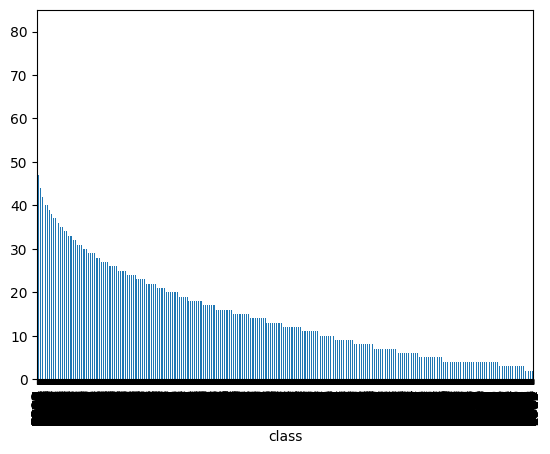

In [4]:
df_train['class'].value_counts().plot(kind='bar')

<Axes: xlabel='group'>

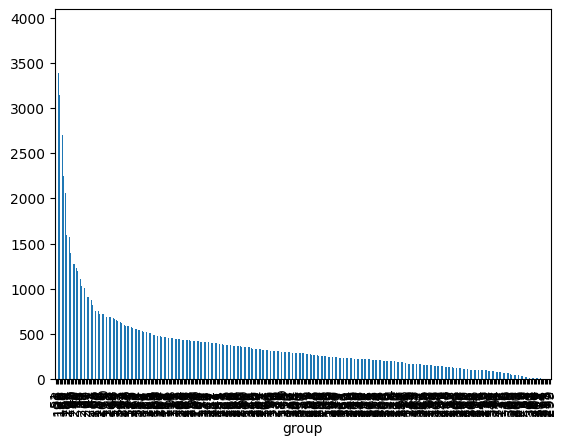

In [7]:
df_train['group'].value_counts().plot(kind='bar')

In [ ]:
def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    

    for label_id, label in enumerate(labels[:10]):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds.filter(lambda ex: ex['labels'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = Image.open(f'./{DIRECTROY}/{example['class']}/{example['name']}')
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), )

    return grid

# show_examples(df_train, seed=456, examples_per_class=3)